In [24]:
import numpy as np
from constant import *
from utils import *
import matplotlib.pyplot as plt


In [25]:
def euler_one_step(S,I_moins,I_plus,R_moins,R_plus_I,H,U,R_plus_H,D,D_R,i,cst):
    S_1        = S-cst['tau'][i]*S*I_moins*deltaT
    I_moins_1  = I_moins + (cst['tau'][i]*S*I_moins-cst['lambda_1']*I_moins-(cst['gamma_IR']+cst['gamma_IH']+cst['gamma_IU'])*I_moins)*deltaT
    I_plus_1   = I_plus +(cst['lambda_1']*I_moins-(cst['gamma_IR']+cst['gamma_IH']+cst['gamma_IU'])*I_plus)*deltaT
    R_moins_1  = R_moins +(cst['gamma_IR']*I_moins-cst['lambda_2']*R_moins)*deltaT
    R_plus_I_1 = R_plus_I + (cst['gamma_IR']*I_plus+cst['lambda_2']*R_moins)*deltaT
    H_1        = H + (cst['gamma_IH']*(I_moins + I_plus)-(cst['gamma_HR']+cst['gamma_HD']+cst['gamma_HU'])*H)*deltaT
    U_1        = U + (cst['gamma_IU']*(I_moins + I_plus)+cst['gamma_HU']*H-(cst['gamma_UR'] + cst['gamma_UD'])*U)*deltaT
    R_plus_H_1 = R_plus_H+ (cst['gamma_HR']*H+cst['gamma_UR']*U)*deltaT
    D_1        = D + (cst['gamma_UD']*U+cst['gamma_HD']*H)*deltaT  
    D_R_1      = D_R +((cst['lambda_1']+cst['gamma_IH']+cst['gamma_IU'])*I_moins-D_R)*deltaT
    
    
    return(S_1,I_moins_1,I_plus_1,R_moins_1,R_plus_I_1,H_1,U_1,R_plus_H_1,D_1,D_R_1)


def resolution_systeme(set_size, deltaT,cst):
    Res = np.zeros((N_VARIABLE,set_size))
    Res[0,0] = cst['S_0'] 
    Res[1,0] = cst['I_moins_0']
    
    for i in range(1,set_size):
        Res[:,i] = euler_one_step(Res[0,i-1],Res[1,i-1],Res[2,i-1],Res[3,i-1],Res[4,i-1],Res[5,i-1],Res[6,i-1],Res[7,i-1],Res[8,i-1],Res[9,i-1],i,cst)
 
    return Res


In [26]:
def Monte_Carlo(M):
    peak_value,peak_day, pos = [],[], []
    
    for i in range(M):
        cst = init_constant()
        try : 
            results = resolution_systeme(set_size,deltaT,cst)
            peak_value.append(np.max(results[6,:]))
            peak_day.append(int(np.argmax(list(results[6,:]))*deltaT))
            pos.append(np.max(results[2,:]))
        except:
            print(f"Try n°{i} failed")
    return peak_value,peak_day, pos
    

In [27]:
a = Monte_Carlo(10000)

In [30]:
peak_value,peak_day, pos = a[0],a[1],a[2]

In [31]:
peak_value=np.array(peak_value)
peak_day  =np.array(peak_day)
pos = np.array(pos)

(array([6.169e+03, 7.620e+02, 4.310e+02, 2.700e+02, 1.970e+02, 1.840e+02,
        1.450e+02, 1.480e+02, 1.160e+02, 1.110e+02, 1.000e+02, 1.050e+02,
        9.700e+01, 7.000e+01, 8.000e+01, 5.800e+01, 6.200e+01, 5.200e+01,
        5.900e+01, 5.700e+01, 4.200e+01, 4.800e+01, 4.500e+01, 3.200e+01,
        3.700e+01, 2.700e+01, 3.800e+01, 3.400e+01, 3.300e+01, 2.300e+01,
        2.800e+01, 1.900e+01, 2.400e+01, 2.200e+01, 1.900e+01, 2.800e+01,
        1.300e+01, 1.400e+01, 1.000e+01, 1.500e+01, 1.800e+01, 6.000e+00,
        1.000e+01, 9.000e+00, 8.000e+00, 1.100e+01, 6.000e+00, 7.000e+00,
        7.000e+00, 8.000e+00, 3.000e+00, 5.000e+00, 9.000e+00, 6.000e+00,
        4.000e+00, 4.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+0

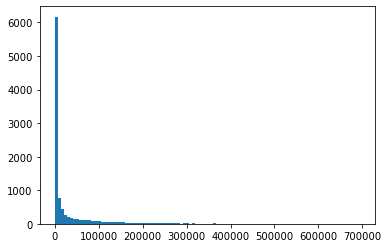

In [32]:
plt.hist(peak_value,bins = 100)

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  3.,  0.,  1.,  4.,  4.,  0.,  2.,  5.,
         0.,  5.,  3.,  5.,  0.,  6.,  3.,  9.,  0.,  9., 12., 11.,  0.,
         8., 10.,  8.,  0., 11.,  8., 11.,  0., 14., 11.,  0.,  9., 10.,
         7.,  0., 21., 21., 12.,  0., 16., 15.,  8.,  0., 15., 14., 10.,
         0., 17.,  8., 12.,  0., 12.,  9., 12.,  0.,  6.,  6.,  0.,  8.,
         7.,  2.,  0.,  1.,  3.,  8.,  0.,  4.,  2.,  5.,  0.,  3.,  3.,
         3.,  0.,  0.,  2.,  5.,  0.,  3.,  2., 30.]),
 array([25.  , 25.74, 26.48, 27.22, 27.96, 28.7 , 29.44, 30.18, 30.92,
        31.66, 32.4 , 33.14, 33.88, 34.62, 35.36, 36.1 , 36.84, 37.58,
        38.32, 39.06, 39.8 , 40.54, 41.28, 42.02, 42.76, 43.5 , 44.24,
        44.98, 45.72, 46.46, 47.2 , 47.94, 48.68, 49.42, 50.16, 50.9 ,
        51.64, 52.38, 53.12, 53.86, 54.6 , 55.34, 56.08, 56.82, 57.56,
        58.3 , 59.04, 59.78, 60.52, 61.26, 62.  , 62.74, 63.48, 64.22,
        

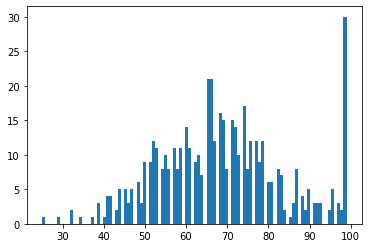

In [8]:

plt.hist(peak_day,bins = 100)

(array([276.,  55.,  28.,  11.,  13.,  10.,   8.,   1.,   4.,   9.,   4.,
          3.,   4.,   8.,   2.,   2.,   2.,   1.,   3.,   3.,   0.,   0.,
          3.,   2.,   1.,   1.,   2.,   1.,   4.,   0.,   2.,   1.,   4.,
          0.,   2.,   2.,   1.,   2.,   1.,   0.,   3.,   2.,   1.,   0.,
          1.,   0.,   3.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.56416119e-01, 1.26105792e+03, 2.52195943e+03, 3.78286094e+03,
        5.04376245e+03, 6.30466395e+03, 7.56556546e+03, 8.82646697e+03,
        1.00873685e+04, 1.13482700e+04, 1.26091715e+04, 1.38700730e+04,
        1.51309745e+04, 1.63918760e+04, 1.76527775e+04, 1.89136790e+04,
        2.01745805e+04, 2.1435

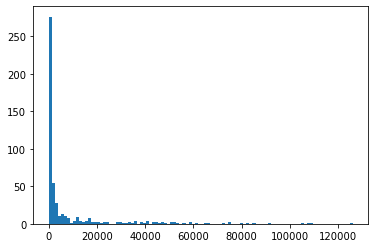

In [9]:
plt.hist(pos,bins = 100)

In [10]:
max(pos)

126090.30714767137

In [11]:
deltaT

0.1

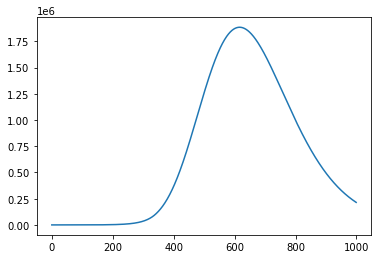

In [72]:
cst = init_constant()
results = resolution_systeme(set_size,deltaT,cst)

plt.plot(results[1,:])



In [35]:
print(cst['t_0'])
print(cst['N'])

24
48


array([ 5231.55646966,   290.67343937, 14611.37789618, ...,
       16243.80602498,    17.61202828,   914.17534922])